In [19]:
#load libraries, dependencies
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols # Ordinary Least Squares (OLS) model
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("Resources/ANOVA_merged.csv")
df

,SampleID,CHL1_OID01216,NRP1_OID01217,PLXNB2_OID01218,FCGR3B_OID01219,LILRB5_OID01220,APOM_OID01221,SOD1_OID01222,CA1_OID01223,TIMP1_OID01224,...,FABP9_OID01115,TMPRSS15_OID01116,LHB_OID01117,FOSB_OID01118,CALR_OID01119,PGF_OID01493,Subject,Response,Site,Time
0,A1,12.956143,3.729709,2.086122,11.609629,0.724192,8.542624,9.452978,7.795929,3.116308,...,5.698748,1.640175,1.187713,3.843168,1.278116,2.457126,ID1,Nonresponder,Site_D,Baseline
1,A2,11.269477,6.144801,1.483985,17.582141,3.329488,10.395668,7.704559,6.388902,0.793348,...,5.751120,1.433037,2.068403,2.972200,4.908331,3.756646,ID1,Nonresponder,Site_D,Week.6
2,A3,25.451070,6.950510,1.228214,10.494904,4.392219,14.669500,11.206255,1.333532,3.839500,...,9.776941,2.514728,0.530500,0.803449,5.720805,2.195161,ID1,Nonresponder,Site_D,Week.12
3,A4,14.453038,3.725393,3.278853,14.969670,1.132330,16.194933,12.066842,-0.580701,4.565457,...,8.191348,4.953789,1.588413,1.929322,6.883288,2.552394,ID2,Nonresponder,Site_C,Baseline
4,A5,7.628712,7.198343,4.989030,13.087540,1.237068,15.074472,2.201737,2.005555,4.600080,...,5.697130,1.292394,1.370663,2.180779,13.823078,1.381204,ID2,Nonresponder,Site_C,Week.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,B75,13.024688,3.918886,3.163334,11.961131,1.396265,7.350203,19.334173,2.183027,4.348268,...,7.463973,3.605572,2.263226,3.107379,11.549792,4.065760,ID51,Nonresponder,Site_A,Week.6
152,B76,12.651836,9.767998,3.262239,14.746187,4.040677,13.739613,8.324083,-0.940497,2.920415,...,6.148645,4.861764,1.012678,2.734845,7.009428,3.234534,ID51,Nonresponder,Site_A,Week.12
153,B77,9.975178,8.553449,4.280947,9.935137,-1.353013,14.539348,18.308870,3.671944,4.036374,...,4.545576,7.561058,2.832326,6.894978,9.119377,1.562843,ID52,Responder,Site_B,Baseline
154,B78,12.819363,6.103985,3.618611,5.405530,1.842243,2.258826,13.683191,2.474751,4.637519,...,5.108254,1.430722,2.790248,5.766232,6.157426,1.856033,ID52,Responder,Site_B,Week.6


In [21]:
# create Responder dataframe and set the index to the SampleID column
df_response = df.loc[df["Response"] == "Responder"]
df_response = df_response.set_index("SampleID")

#df_site = df.loc[df['Time']=="Baseline"]

In [22]:
df_response

,CHL1_OID01216,NRP1_OID01217,PLXNB2_OID01218,FCGR3B_OID01219,LILRB5_OID01220,APOM_OID01221,SOD1_OID01222,CA1_OID01223,TIMP1_OID01224,CST3_OID01225,...,FABP9_OID01115,TMPRSS15_OID01116,LHB_OID01117,FOSB_OID01118,CALR_OID01119,PGF_OID01493,Subject,Response,Site,Time
SampleID,,,,,,,,,,,,,,,,,,,,,
A16,11.431302,10.207661,3.311984,10.313994,3.526815,13.334769,10.661415,3.454648,4.788196,9.268302,...,6.619953,4.255823,1.365903,4.198838,9.932363,1.203303,ID6,Responder,Site_D,Baseline
A17,9.745531,3.234661,3.780135,4.826243,1.886590,15.829464,7.641103,6.842145,6.775038,10.627710,...,9.504588,6.542672,2.296388,3.239329,13.900062,2.391151,ID6,Responder,Site_D,Week.6
A18,10.631295,8.808551,3.740067,20.919796,0.853839,5.589258,10.256434,6.054641,5.189150,14.001674,...,5.092211,2.592408,1.717529,3.352125,8.710175,2.696352,ID6,Responder,Site_D,Week.12
A22,14.413956,4.499181,2.157865,11.475391,5.275544,8.329090,9.415025,4.355936,1.821448,3.862319,...,8.651560,4.555464,2.556959,4.786705,7.431784,4.816519,ID8,Responder,Site_D,Baseline
A23,16.710825,6.563803,1.885564,11.241045,4.885964,6.201427,8.990009,6.098669,3.703675,7.623529,...,6.781035,-0.302136,1.883831,1.855008,8.347734,4.862274,ID8,Responder,Site_D,Week.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B72,5.882346,11.388225,-0.599872,1.775421,7.611801,13.148213,9.304414,2.110362,5.602710,7.587523,...,6.131907,2.705612,1.936448,1.012736,9.192695,3.511939,ID50,Responder,Site_B,Week.6
B73,7.506983,9.413361,-0.036989,9.881755,6.484933,8.105241,14.910704,1.080454,4.795368,11.803293,...,7.285554,3.784381,2.111411,2.968140,8.659603,5.063345,ID50,Responder,Site_B,Week.12
B77,9.975178,8.553449,4.280947,9.935137,-1.353013,14.539348,18.308870,3.671944,4.036374,7.545368,...,4.545576,7.561058,2.832326,6.894978,9.119377,1.562843,ID52,Responder,Site_B,Baseline


In [23]:
# create list of all ProteinIDs to use in ANOVA 'value_vars' for stacked dataframe format
protName_df = df_response.drop(["Subject", "Response", "Site", "Time"], axis=1)
protein_list = protName_df.columns.tolist()
#protein_list

In [24]:
# reshape the df_response dataframe suitable (stacked format) for statsmodels package 
Responder_melt = pd.melt(df_response, id_vars=['Time'], value_vars=protein_list)
# replace column names
Responder_melt.columns = ['Time', 'Protein', 'NPX']
Responder_melt.dropna(inplace=True)
Responder_melt['NPX'] = Responder_melt['NPX'].apply(pd.to_numeric)
Responder_melt
Responder_melt.dtypes

Time        object
Protein     object
NPX        float64
dtype: object

In [25]:
Responder_melt

,Time,Protein,NPX
0,Baseline,CHL1_OID01216,11.431302
1,Week.6,CHL1_OID01216,9.745531
2,Week.12,CHL1_OID01216,10.631295
3,Baseline,CHL1_OID01216,14.413956
4,Week.6,CHL1_OID01216,16.710825
...,...,...,...
76171,Week.6,PGF_OID01493,3.511939
76172,Week.12,PGF_OID01493,5.063345
76173,Baseline,PGF_OID01493,1.562843
76174,Week.6,PGF_OID01493,1.856033


In [61]:
test_data = Responder_melt.loc[Responder_melt["Protein"] == "DNAJB1_OID01342"]
test_data

,Time,Protein,NPX
21390,Baseline,DNAJB1_OID01342,9.908700
21391,Week.6,DNAJB1_OID01342,6.608080
21392,Week.12,DNAJB1_OID01342,5.682444
21393,Baseline,DNAJB1_OID01342,3.275847
21394,Week.6,DNAJB1_OID01342,7.530292
...,...,...,...
21454,Week.6,DNAJB1_OID01342,10.377587
21455,Week.12,DNAJB1_OID01342,9.569093
21456,Baseline,DNAJB1_OID01342,6.967528
21457,Week.6,DNAJB1_OID01342,9.478562


In [58]:
test_data.dtypes

Time        object
Protein     object
NPX        float64
dtype: object

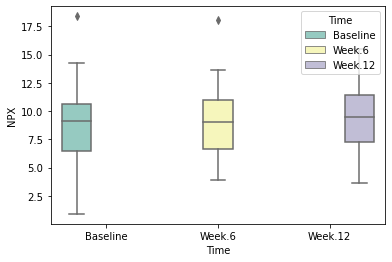

In [62]:
# generate a boxplot to see the data distribution by Time 
sns.boxplot(x="Time", y="NPX", hue="Time", data=test_data, palette="Set3")

In [63]:
# C(Site):C(Uniprot ID) represent interaction term
model = ols('NPX ~ C(Time)', data=test_data).fit()

# Type 3 sums of squares (SS) ('typ=3') is recommended for an unbalanced design for multifactorial ANOVA
anova_table_test = sm.stats.anova_lm(model, typ=2)
anova_table_test

,sum_sq,df,F,PR(>F)
C(Time),2.232392,2.0,0.096835,0.907834
Residual,760.765966,66.0,NaN,NaN


In [42]:
anova_table_test.dtypes

sum_sq    float64
df        float64
F         float64
PR(>F)    float64
dtype: object

In [43]:
anova_protein = {"Protein":[], "ANOVA":[]}
for protein in protein_list:
    data = Responder_melt.loc[Responder_melt["Protein"] == protein]
    model = ols('NPX ~ C(Time)', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_protein["Protein"].append(protein)
    anova_protein["ANOVA"].append(anova_table)


In [51]:
anova_protein["ANOVA"][1100]

,sum_sq,df,F,PR(>F)
C(Time),3.890403,2.0,3.517277,0.03536
Residual,36.500763,66.0,NaN,NaN
